<a href="https://colab.research.google.com/github/AliEbadi110/Tabular-Data-Regression-Sample-Projects/blob/main/Tabular_Data_Scikit_Learn_Regression_E_Commerce_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabular Data - Scikit Learn - Regression - E-Commerce Customers**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 2. Exploring the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
Email,500,500,mstephenson@fernandez.com,1
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1
Avatar,500,138,SlateBlue,7


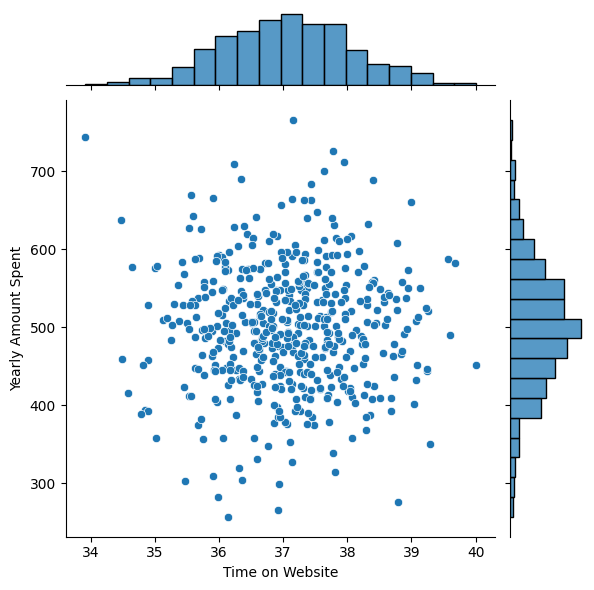

In [ ]:
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent')

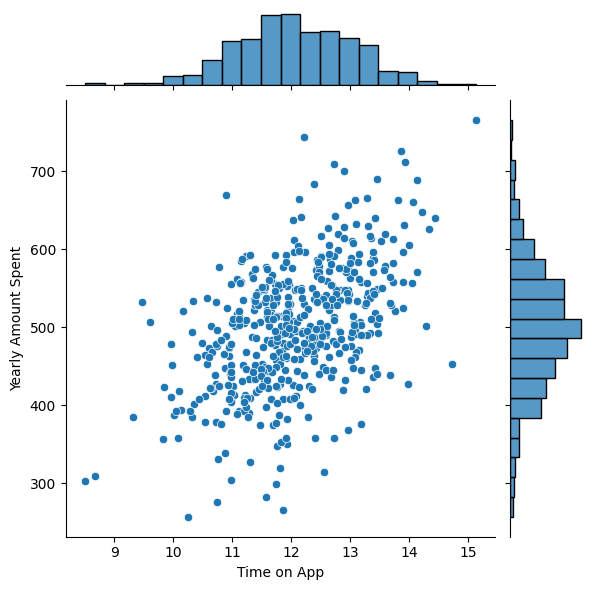

In [ ]:
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent')

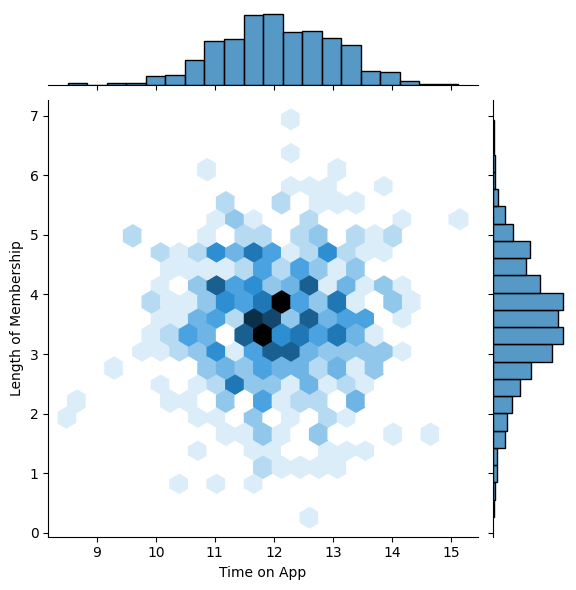

In [ ]:
sns.jointplot(data=df, x='Time on App', y='Length of Membership', kind= 'hex')

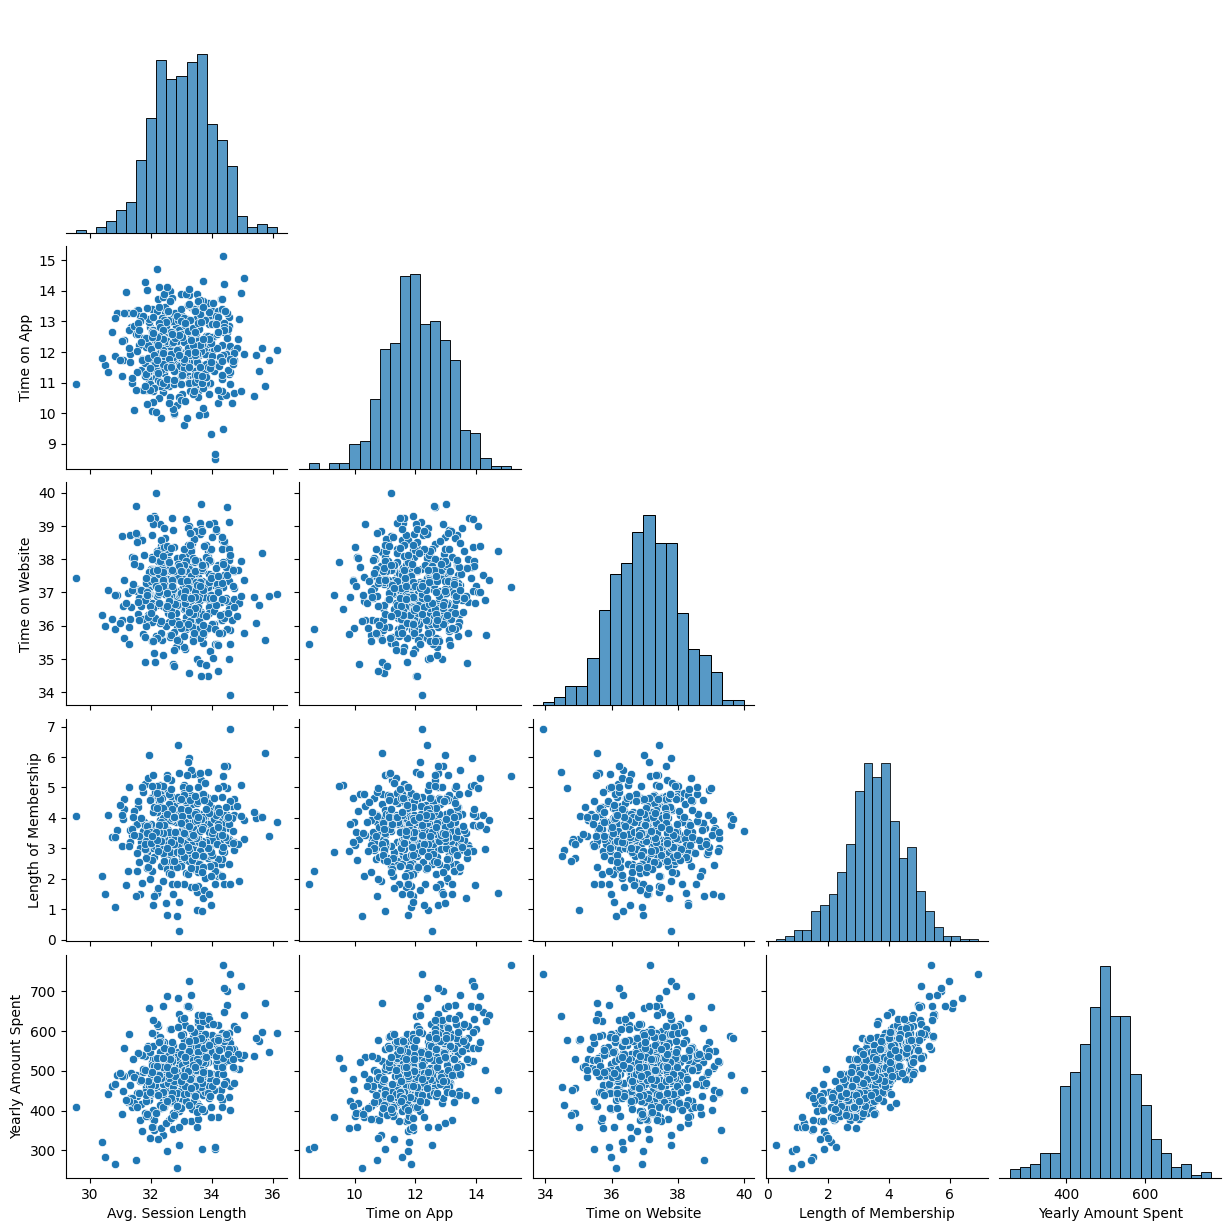

In [ ]:
sns.pairplot(data=df, diag_kind="hist", corner=True)

<ipython-input-11-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

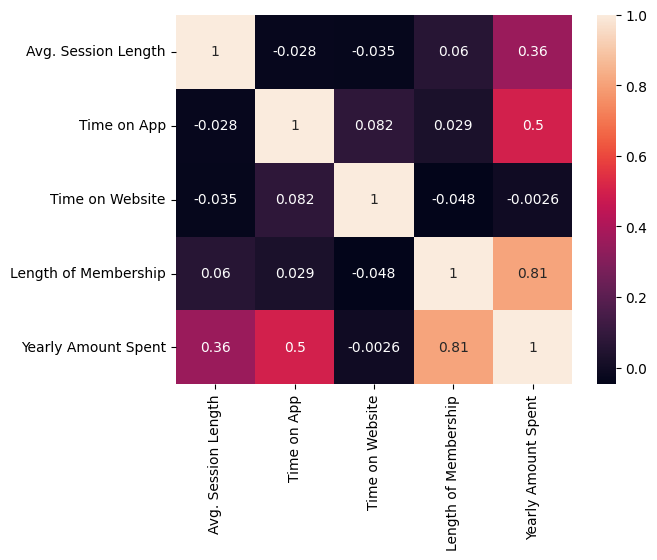

In [ ]:
sns.heatmap(df.corr(), annot=True)

## 3. Target Variable Preprocessing

In [ ]:
df['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

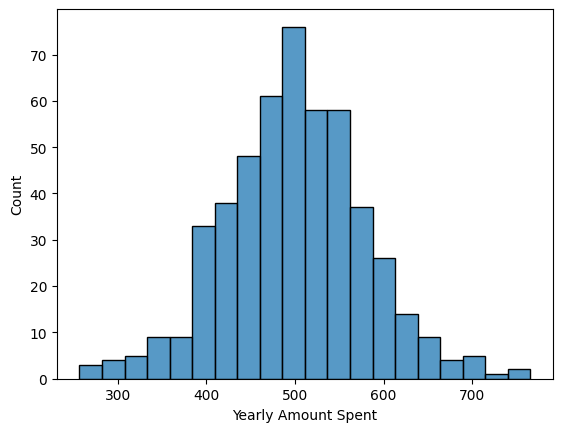

In [ ]:
sns.histplot(df['Yearly Amount Spent'])

In [ ]:
df['Yearly Amount Spent'].isnull().sum()

0

## 3. Remove Useless Features

In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [ ]:
# remove Useless features
df = df.drop(columns=['Email', 'Address', 'Avatar'])

## 4. Handling Missing Values

In [ ]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<Axes: >

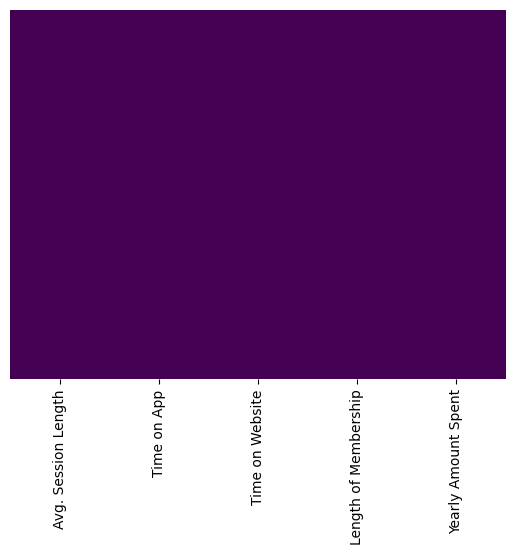

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 6. Handle Categorical Variables

In [ ]:
# There is no Categorical Data
df.dtypes

Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

## 6. Check Correlations

In [ ]:
df.corr()[['Yearly Amount Spent']].style.background_gradient(cmap='Greens')

,Yearly Amount Spent
Avg. Session Length,0.355088
Time on App,0.499328
Time on Website,-0.002641
Length of Membership,0.809084
Yearly Amount Spent,1.000000


## 7. Train_Test_Split

In [ ]:
y = df['Yearly Amount Spent']
X = df.drop(columns='Yearly Amount Spent')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Scale the Data

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## 8. Define, Fit

> **Linear Regression**

In [ ]:
LR_model = LinearRegression()

In [ ]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR_model.intercept_

501.992151212453

In [ ]:
coef_df = pd.DataFrame(LR_model.coef_, index=X.columns, columns=['Coeff'])
coef_df

,Coeff
Avg. Session Length,25.250381
Time on App,38.703501
Time on Website,0.315469
Length of Membership,63.543211


> **Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
X_poly = poly.fit_transform(X_train)

In [ ]:
PR_model = LinearRegression()

In [ ]:
PR_model.fit(X_poly, y_train)

LinearRegression()

> **Support Vector Regression**

In [ ]:
y_train_svr = y_train.values.reshape(-1, 1)
y_test_svr = y_test.values.reshape(-1, 1)

In [ ]:
y_scaler = StandardScaler()

In [ ]:
y_train_scaled = y_scaler.fit_transform(y_train_svr)

In [ ]:
SVR_model = SVR(kernel='rbf')

In [ ]:
SVR_model.fit(X_train, y_train_scaled.flatten())

SVR()

> **Decision Tree Regression**

In [ ]:
DTR_model = DecisionTreeRegressor(random_state=0)

In [ ]:
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

> **Random Forest Regression**

In [ ]:
RFR_model = RandomForestRegressor(random_state=0)

In [ ]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## 11. Predict, Evaluate

> **Linear Regression**

In [ ]:
predictions = LR_model.predict(X_test)

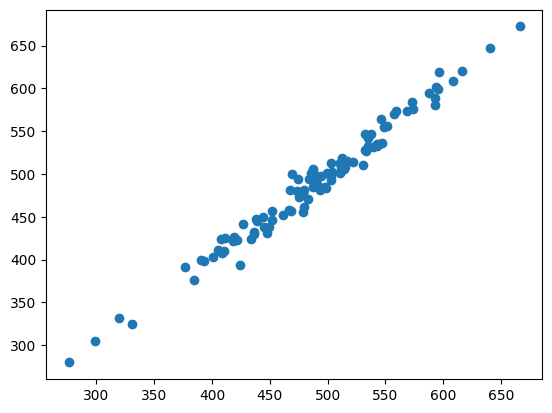

In [ ]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

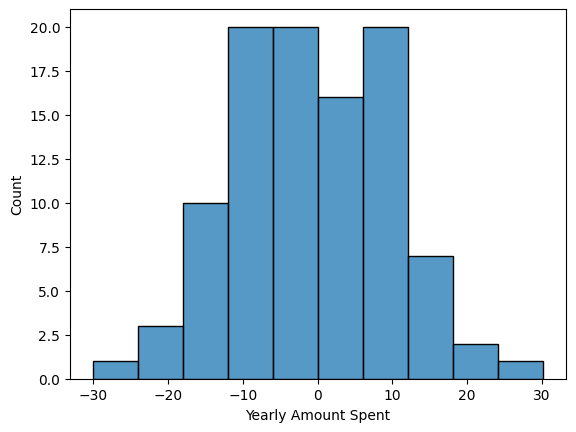

In [ ]:
sns.histplot(y_test-predictions)

In [ ]:
mean_absolute_error(y_test,predictions)

8.558441885315247

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

10.481590584636482

In [ ]:
r2_score(y_test, predictions)

0.9778130629184126

> **Polynomial Regression**

In [ ]:
predictions = PR_model.predict( poly.transform(X_test))

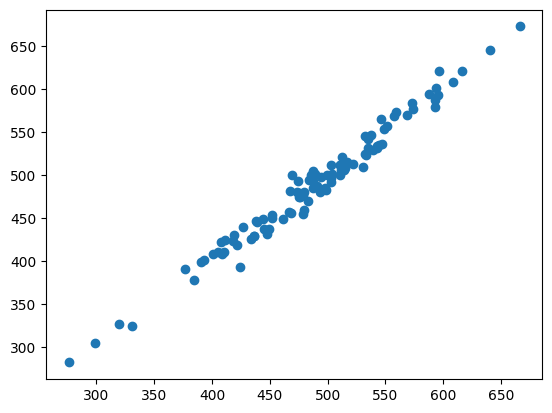

In [ ]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

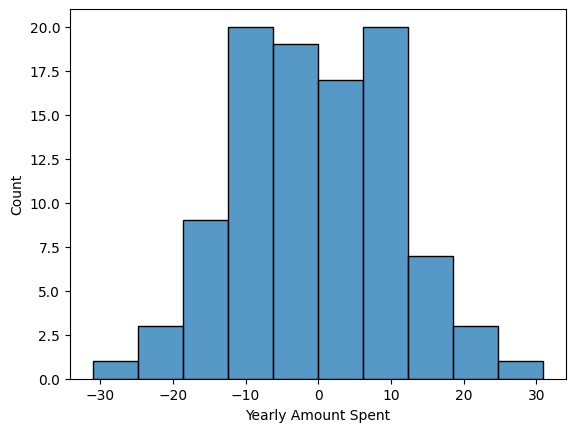

In [ ]:
sns.histplot(y_test-predictions)

In [ ]:
mean_absolute_error(y_test,predictions)

8.836198350857941

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

10.77356911482265

In [ ]:
r2_score(y_test, predictions)

0.9765597536302033

> **Support Vector Regression**

In [ ]:
predictions = SVR_model.predict(X_test)

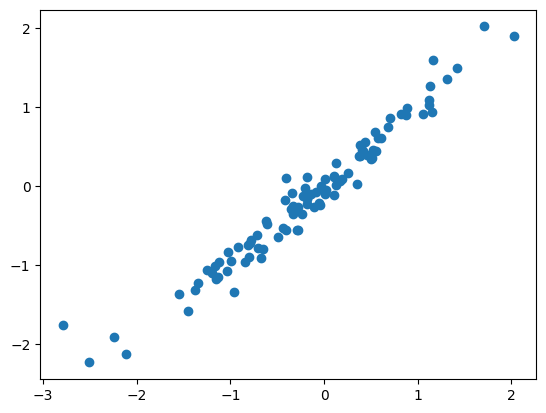

In [ ]:
plt.scatter(y_scaler.transform(y_test_svr).flatten(), predictions)

<Axes: ylabel='Count'>

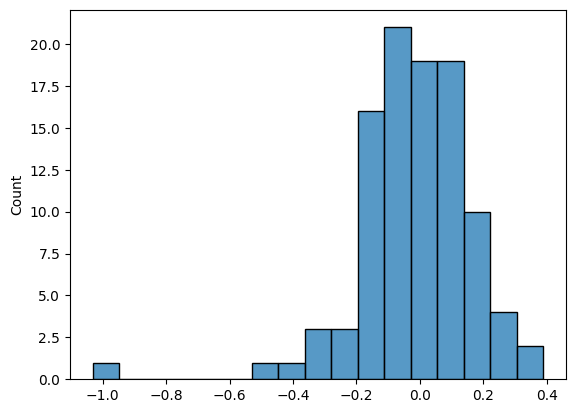

In [ ]:
sns.histplot((y_scaler.transform(y_test_svr).flatten()) - predictions)

In [ ]:
mean_absolute_error(y_scaler.transform(y_test_svr).flatten(), predictions)

0.13199209156952027

In [ ]:
np.sqrt(mean_squared_error(y_scaler.transform(y_test_svr).flatten(), predictions))

0.18628206908050235

In [ ]:
r2_score(y_scaler.transform(y_test_svr).flatten(), predictions)

0.9539302108070699

> **Decision Tree Regression**

In [ ]:
predictions = DTR_model.predict(X_test)

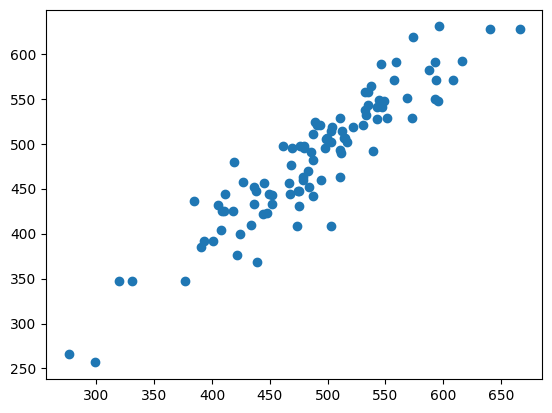

In [ ]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

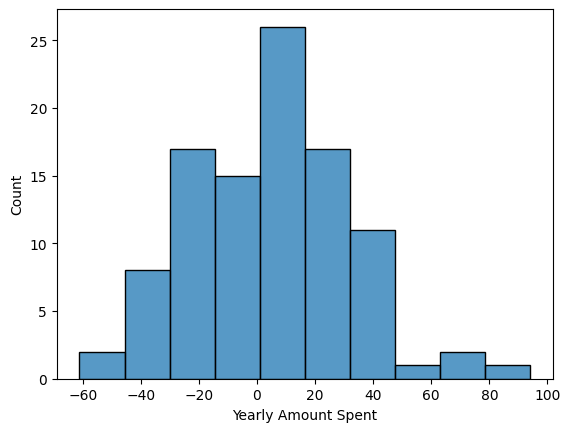

In [ ]:
sns.histplot(y_test-predictions)

In [ ]:
mean_absolute_error(y_test,predictions)

22.18931097870347

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

28.070807105280085

In [ ]:
r2_score(y_test, predictions)

0.840869741761538

> **Random Forest Regression**

In [ ]:
predictions = RFR_model.predict(X_test)

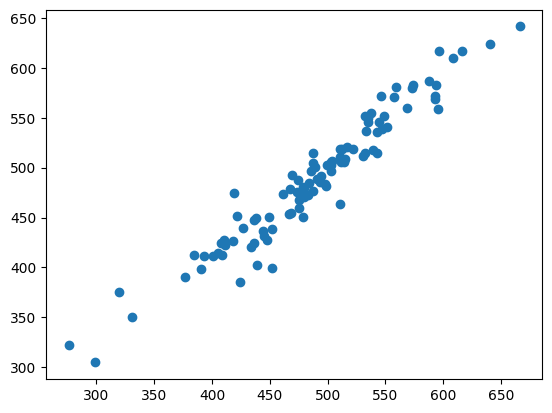

In [ ]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

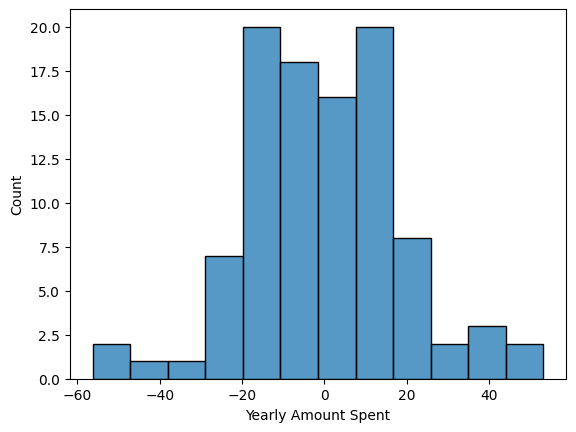

In [ ]:
sns.histplot(y_test-predictions)

In [ ]:
mean_absolute_error(y_test,predictions)

14.240340174390873

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

18.73713285019053

In [ ]:
r2_score(y_test, predictions)

0.9290995094648153